In [1]:
!pip install opencv-python pandas matplotlib

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


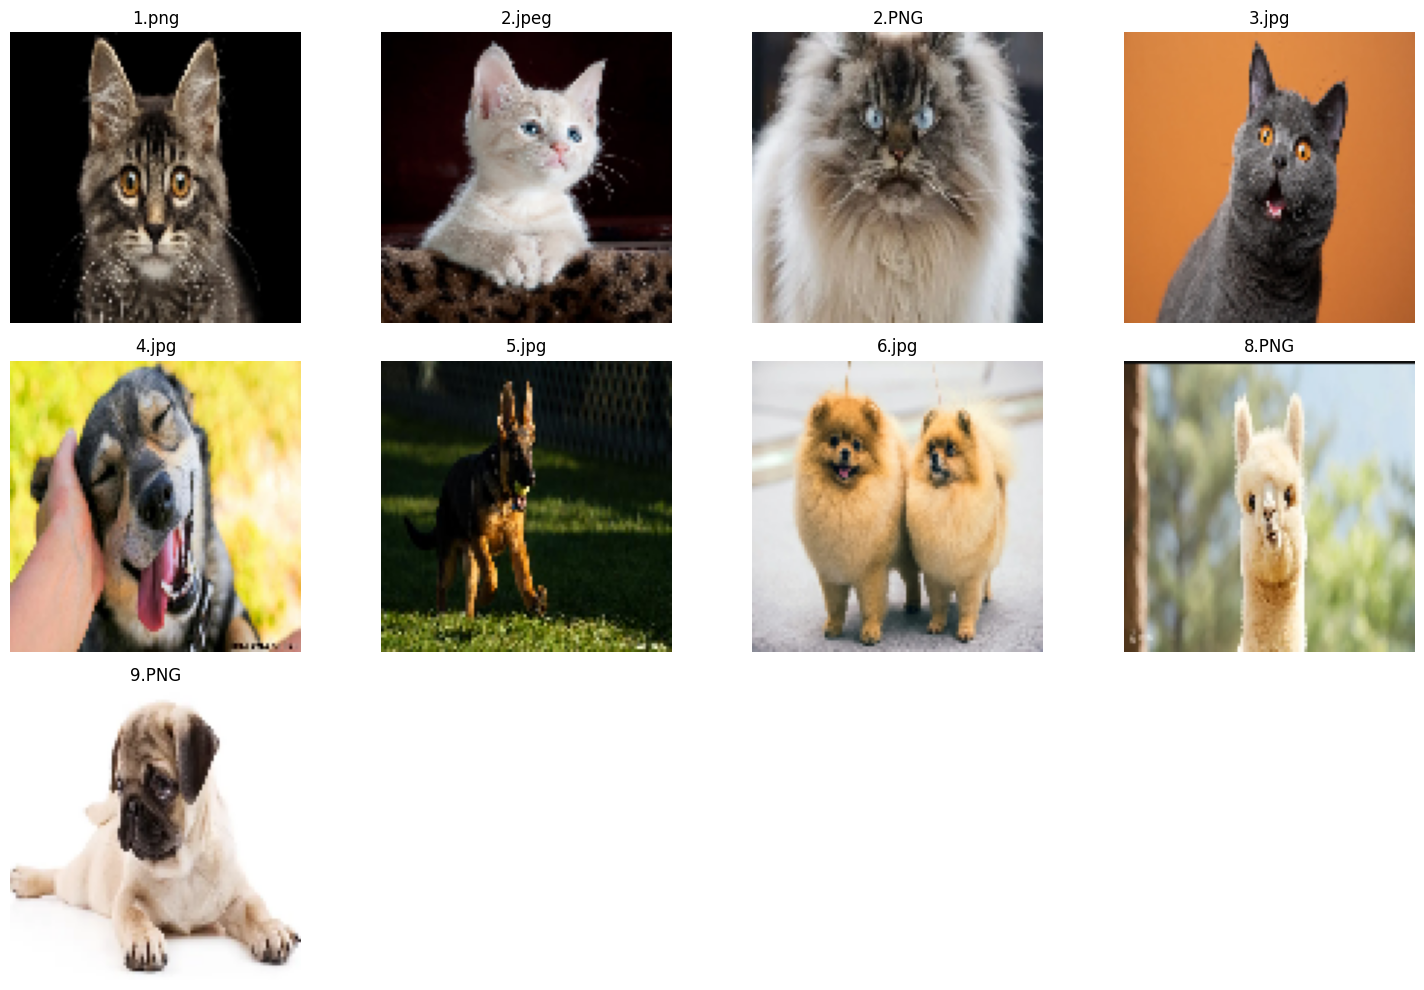

  file_name color_model format  number_of_channels  file_size_mb  image_width  \
0     1.png         BGR    png                   3          0.70          967   
1    2.jpeg         BGR   jpeg                   3          0.05          718   
2     2.PNG         BGR    PNG                   3          0.47          716   
3     3.jpg         BGR    jpg                   3          0.06          730   
4     4.jpg         BGR    jpg                   3          0.03          700   
5     5.jpg         BGR    jpg                   3          0.04          700   
6     6.jpg         BGR    jpg                   3          0.07          800   
7     8.PNG         BGR    PNG                   3          0.56          960   
8     9.PNG         BGR    PNG                   3          0.21          578   

   image_height                           full_path  \
0           601   C:\Users\bahar\lab5\images2\1.png   
1           750  C:\Users\bahar\lab5\images2\2.jpeg   
2           450   C:\Use

In [11]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1

def get_image_info(folder_path):
    data = []
    for file_path in glob.glob(os.path.join(folder_path, '*')):
        if not file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            continue
        
        img = cv2.imread(file_path)
        if img is None:
            continue
        filename = os.path.basename(file_path) 
        color_model = 'BGR'                    
        file_format = os.path.splitext(filename)[1][1:]  
        channels = img.shape[2] if len(img.shape) == 3 else 1 
        file_size_mb = os.path.getsize(file_path) / (1024 * 1024)  
        height, width = img.shape[:2]           
        full_path = file_path                   
        thumbnail = cv2.resize(img, (100, 100)) 
    
        data.append({
            'file_name': filename,
            'color_model': color_model,
            'format': file_format,
            'number_of_channels': channels,
            'file_size_mb': round(file_size_mb, 2),
            'image_width': width,
            'image_height': height,
            'full_path': full_path,
            'thumbnail': thumbnail
        })

    df = pd.DataFrame(data)
    return df

# Function to display thumbnails in a DataFrame
def display_thumbnails(df):
    plt.figure(figsize=(15, 10))
    for i, row in df.iterrows():
        ax = plt.subplot(len(df) // 4 + 1, 4, i + 1)
        ax.imshow(cv2.cvtColor(row['thumbnail'], cv2.COLOR_BGR2RGB))
        ax.set_title(row['file_name'])
        ax.axis('off')
    plt.tight_layout()
    plt.show()


folder_path = r'C:\Users\bahar\lab5\images2' 
image_info_df = get_image_info(folder_path)  
display_thumbnails(image_info_df)
print(image_info_df)


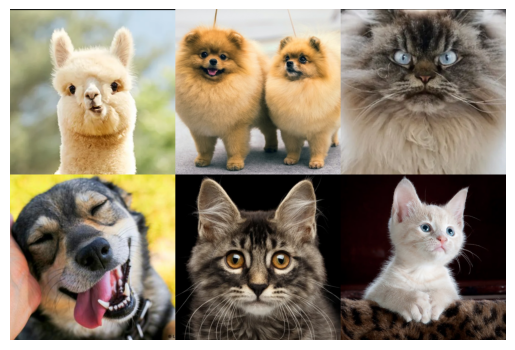

In [10]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def create_square_image(img):
    height, width = img.shape[:2]
    size = min(height, width)
    center_x, center_y = width // 2, height // 2
    cropped_img = img[center_y - size // 2:center_y + size // 2, 
                      center_x - size // 2:center_x + size // 2]
    return cv2.resize(cropped_img, (500, 500))

def create_poster(folder_path, output_filename, cols, rows):
    images = []
    for file_path in glob.glob(os.path.join(folder_path, '*')):
        if not file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            continue
        
        img = cv2.imread(file_path)
        if img is not None:
            square_img = create_square_image(img)
            images.append(square_img)
    
    if len(images) < cols * rows:
        raise ValueError("Not enough images to fill the poster.")

    poster_images = random.sample(images, cols * rows)
    poster_images = np.array(poster_images).reshape((rows, cols, 500, 500, 3))

    poster_height = 500 * rows
    poster_width = 500 * cols
    poster = np.zeros((poster_height, poster_width, 3), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            poster[i * 500:(i + 1) * 500, j * 500:(j + 1) * 500] = poster_images[i, j]

    cv2.imwrite(output_filename, poster)
    plt.imshow(cv2.cvtColor(poster, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
folder_path = r'C:\Users\bahar\lab5\images2' 
output_file = 'poster.jpg'  # Specify output filename
create_poster(folder_path, output_file, cols=3, rows=2)

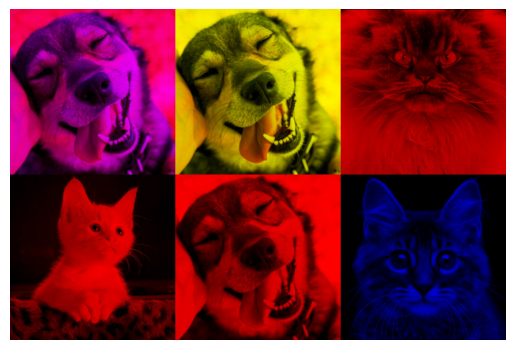

In [12]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def create_square_image(img):
    """Crop the image to a square centered on the image."""
    height, width = img.shape[:2]
    size = min(height, width)
    center_x, center_y = width // 2, height // 2
    cropped_img = img[center_y - size // 2:center_y + size // 2,
                      center_x - size // 2:center_x + size // 2]
    return cv2.resize(cropped_img, (500, 500))

def apply_color_filter(img, color):
    """Apply a color filter to the image."""
    b, g, r = cv2.split(img)
    if color == 'red':
        return cv2.merge((np.zeros_like(b), np.zeros_like(g), r))
    elif color == 'green':
        return cv2.merge((np.zeros_like(b), g, np.zeros_like(r)))
    elif color == 'blue':
        return cv2.merge((b, np.zeros_like(g), np.zeros_like(r)))
    elif color == 'yellow':
        return cv2.merge((b, g, np.zeros_like(r)))
    elif color == 'magenta':
        return cv2.merge((np.zeros_like(b), g, r))
    elif color == 'cyan':
        return cv2.merge((b, np.zeros_like(g), r))
    else:
        return img  # No filter applied

def create_poster(folder_path, output_filename, cols, rows):
    images = []
    for file_path in glob.glob(os.path.join(folder_path, '*')):
        if not file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            continue
        
        img = cv2.imread(file_path)
        if img is not None:
            square_img = create_square_image(img)
            images.append(square_img)
    
    # Check if there are enough images
    if len(images) < cols * rows:
        raise ValueError("Not enough images to fill the poster.")

    poster_height = 500 * rows
    poster_width = 500 * cols
    poster = np.zeros((poster_height, poster_width, 3), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            img = random.choice(images)
            color_filter = random.choice(['red', 'green', 'blue', 'yellow', 'magenta', 'cyan'])
            filtered_img = apply_color_filter(img, color_filter)
            poster[i * 500:(i + 1) * 500, j * 500:(j + 1) * 500] = filtered_img

    cv2.imwrite(output_filename, poster)
    return poster

folder_path = r'C:\Users\bahar\lab5\images2' 
output_files = [f'poster_{i}.jpg' for i in range(1, 5)] 

for output_file in output_files:
    create_poster(folder_path, output_file, cols=3, rows=2)

# Display one of the posters
poster = cv2.imread(output_files[0])
plt.imshow(cv2.cvtColor(poster, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()